# PREDECIR LA SUPERVIVENCIA DEL TITANIC


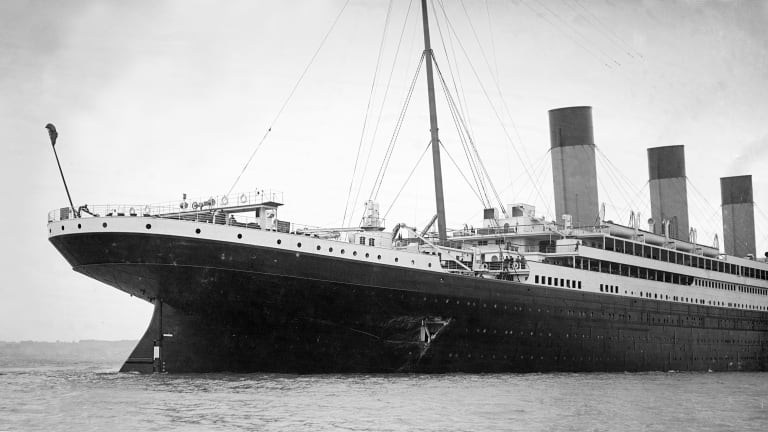

#### IMPORTAR LIBRERIAS

<img src="https://i0.wp.com/www.ozgurozkok.com/wp-content/uploads/2019/12/numpy-python.png?fit=765%2C306&ssl=1" width="200">
<img src="https://pythonawesome.com/content/images/2018/05/pandas-logo.png" width="200">


In [1]:
import numpy as np #Libreria para para crear vectores y matrices grandes multidimensionales, junto con una gran colección de funciones matemáticas de alto nivel para operar con ellas.
import pandas as pd # manipulación y análisis de datos para el lenguaje de programación Python. En particular, ofrece estructuras de datos y operaciones para manipular tablas numéricas y series temporales.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#### IMPORTAR DATA DESDE LA WEB

Lo siguiente que vamos hacer serán importar los datos desde la página de Kaggle, guardarlos en nuestra PC y a su vez guardar dichos datos en variables Pandas para poderlos manipular a lo largo del programa.

In [2]:
#Se importa los datos a utilizar de la web
url_test = './test.csv'
url_train = './train.csv'

df_test = pd.read_csv(url_test)
df_train = pd.read_csv(url_train)

#Se guardan los datos en un archivo para siempre tenerlos disponibles
dir_test = './titanic_test.csv'
dir_train = './titanic_train.csv'
df_test.to_csv(dir_test)
df_train.to_csv(dir_train)


In [3]:
df_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Datos de entrenamiento

Las observaciones en el conjunto de entrenamiento forman la experiencia que el algoritmo usa para aprender. En problemas de aprendizaje supervisado, cada observación consiste en una variable de salida observada y una o más variables de entrada observadas.

### Datos de prueba

El conjunto de prueba es un conjunto de observaciones utilizadas para evaluar el rendimiento del modelo utilizando alguna medida de rendimiento. Es importante que no se incluyan observaciones del conjunto de entrenamiento en el conjunto de prueba. Si el conjunto de prueba contiene ejemplos del conjunto de entrenamiento, será difícil evaluar si el algoritmo ha aprendido a generalizarse a partir del conjunto de entrenamiento o simplemente lo ha memorizado.

Un programa que se generaliza bien podrá realizar efectivamente una tarea con nuevos datos. En contraste, un programa que memoriza los datos de entrenamiento aprendiendo un modelo demasiado complejo podría predecir los valores de la variable de respuesta para el conjunto de entrenamiento con precisión, pero no podrá predecir el valor de la variable de respuesta para los nuevos ejemplos. Memorizar el conjunto de entrenamiento se llama ajuste excesivo. Un programa que memoriza sus observaciones puede no realizar bien su tarea, ya que podría memorizar relaciones y estructuras que son ruido o coincidencia. La memorización y generalización del equilibrio, o el ajuste excesivo y el ajuste insuficiente, es un problema común a muchos algoritmos de aprendizaje automático. La regularización se puede aplicar a muchos modelos para reducir el exceso de ajuste.

## ENTENDIMIENTO DE LA DATA

Posteriormente vamos a entender la data que vamos a estar manejando, para ello verificamos la cantidad de datos con la que contamos, el tipo de datos, la cantidad de datos faltantes que tiene el dataset y por último las estadísticas del mismo.

### Verificar la cantidad de datos que hay en el dataset

In [5]:
print('Cantidad de datos:')
print(df_train.shape)
print(df_test.shape)
# el df_test cuenta con 11 columna ya que no se encuentra la columna de sobrevivio, y con el test validamos esa infrmacion

Cantidad de datos:
(891, 12)
(418, 11)


### Verifico el tipo de datos contenida en ambos dataset


In [6]:
print('Tipos de datos:')
print(df_train.info())
print(df_test.info())

Tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    

## Verifico los datos faltantes de los dataset


In [7]:
print('Datos faltantes:')
print(pd.isnull(df_train).sum())
print(pd.isnull(df_test).sum())

Datos faltantes:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


### Verifico las estadísticas del dataset


In [8]:
print('Estadísticas del dataset:')
df_train.describe()


Estadísticas del dataset:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## PREPROCESAMIENTO DE DATOS

Ya que analizamos los datos y sabemos qué tenemos exactamente y qué debemos corregir, procedemos a realizar el preprocesamiento de datos.

In [10]:
#Cambio los datos de sexos en números
df_train['Sex'].replace(['female','male'],[0,1],inplace=True)
df_test['Sex'].replace(['female','male'],[0,1],inplace=True)


In [11]:
#Cambio los datos de embarque en números
df_train['Embarked'].replace(['Q','S', 'C'],[0,1,2],inplace=True)
df_test['Embarked'].replace(['Q','S', 'C'],[0,1,2],inplace=True)

In [12]:
#Reemplazo los datos faltantes en la edad por la media de esta columna
print(df_train["Age"].mean())
print(df_test["Age"].mean())
promedio = 30
df_train['Age'] = df_train['Age'].replace(np.nan, promedio)
df_test['Age'] = df_test['Age'].replace(np.nan, promedio)


29.69911764705882
30.272590361445783


In [13]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,1


In [14]:
#Creo varios grupos de acuerdo a bandas de las edades
#Bandas: 0-8, 9-15, 16-18, 19-25, 26-40, 41-60, 61-100
bins = [0, 8, 15, 18, 25, 40, 60, 100]
names = ['1', '2', '3', '4', '5', '6', '7']
df_train['Age'] = pd.cut(df_train['Age'], bins, labels = names)
df_test['Age'] = pd.cut(df_test['Age'], bins, labels = names)


In [15]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,5,0,0,330911,7.8292,NaN,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,6,1,0,363272,7.0000,NaN,1
2,894,2,"Myles, Mr. Thomas Francis",1,7,0,0,240276,9.6875,NaN,0
3,895,3,"Wirz, Mr. Albert",1,5,0,0,315154,8.6625,NaN,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,4,1,1,3101298,12.2875,NaN,1


In [16]:
#Se elimina la columna de "Cabin" ya que tiene muchos datos perdidos
df_train.drop(['Cabin'], axis = 1, inplace=True)
df_test.drop(['Cabin'], axis = 1, inplace=True)

In [17]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,5,0,0,330911,7.8292,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,6,1,0,363272,7.0000,1
2,894,2,"Myles, Mr. Thomas Francis",1,7,0,0,240276,9.6875,0
3,895,3,"Wirz, Mr. Albert",1,5,0,0,315154,8.6625,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,4,1,1,3101298,12.2875,1


In [18]:
#Elimino las columnas que considero que no son necesarias para el analisis
df_train = df_train.drop(['PassengerId','Name','Ticket'], axis=1)
df_test = df_test.drop(['Name','Ticket'], axis=1)

In [19]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,5,0,0,7.8292,0
1,893,3,0,6,1,0,7.0000,1
2,894,2,1,7,0,0,9.6875,0
3,895,3,1,5,0,0,8.6625,1
4,896,3,0,4,1,1,12.2875,1


In [20]:
#Se elimina las filas con los datos perdidos
df_train.dropna(axis=0, how='any', inplace=True)
df_test.dropna(axis=0, how='any', inplace=True)


In [21]:
#Verifico los datos
print(pd.isnull(df_train).sum())
print(pd.isnull(df_test).sum())

print(df_train.shape)
print(df_test.shape)

print(df_test.head())
print(df_train.head())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
(889, 8)
(417, 8)
   PassengerId  Pclass  Sex Age  SibSp  Parch     Fare  Embarked
0          892       3    1   5      0      0   7.8292         0
1          893       3    0   6      1      0   7.0000         1
2          894       2    1   7      0      0   9.6875         0
3          895       3    1   5      0      0   8.6625         1
4          896       3    0   4      1      1  12.2875         1
   Survived  Pclass  Sex Age  SibSp  Parch     Fare  Embarked
0         0       3    1   4      1      0   7.2500       1.0
1         1       1    0   5      1      0  71.2833       2.0
2         1       3    0   5      0      0   7.9250       1.0
3         1       1    0   5      1      0  53.1000       1.0
4       

## APLICACION DE LOS ALGORITMOS DE MACHINE LEANING

Y ahora si empezamos a implementar los algoritmos de Machine Learning, para este proyecto vamos a implementar algoritmos de regresión logística, vectores de soporte y vecinos más cercanos.

In [22]:
#Separo la columna con la información de los sobrevivientes
X = np.array(df_train.drop(['Survived'], 1))
y = np.array(df_train['Survived'])

In [23]:
X.shape

(889, 7)

In [24]:
y.shape

(889,)

In [25]:
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [26]:
X_train.shape

(711, 7)

In [27]:
X_test.shape

(178, 7)

In [28]:
y_train.shape

(711,)

In [29]:
X_test.shape

(178, 7)

In [30]:
##Regresión logística
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
print('Precisión Regresión Logística:')
print(logreg.score(X_train, y_train))

Precisión Regresión Logística:
0.8185654008438819


C:\Users\1213\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
##Support Vector Machines
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
print('Precisión Soporte de Vectores:')
print(svc.score(X_train, y_train))


Precisión Soporte de Vectores:
0.6821378340365682


In [32]:
##K neighbors
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
print('Precisión Vecinos más Cercanos:')
print(knn.score(X_train, y_train))

Precisión Vecinos más Cercanos:
0.8748241912798875


Ya teniendo nuestros modelos procedemos a realizar la predicción respectiva utilizando la data de prueba.

In [33]:
ids = df_test['PassengerId']

##Regresión logística
prediccion_logreg = logreg.predict(df_test.drop('PassengerId', axis=1))
out_logreg = pd.DataFrame({ 'PassengerId' : ids, 'Survived': prediccion_logreg })
print('Predicción Regresión Logística:')
print(out_logreg.head())

Predicción Regresión Logística:
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1


In [34]:
##Support Vector Machines
prediccion_svc = svc.predict(df_test.drop('PassengerId', axis=1))
out_svc = pd.DataFrame({ 'PassengerId' : ids, 'Survived': prediccion_svc })
print('Predicción Soporte de Vectores:')
print(out_svc.head())

Predicción Soporte de Vectores:
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0


In [36]:
##K neighbors
prediccion_knn = knn.predict(df_test.drop('PassengerId', axis=1))
out_knn = pd.DataFrame({ 'PassengerId' : ids, 'Survived': prediccion_knn })
print('Predicción Vecinos más Cercanos:')
print(out_knn.head(10))

Predicción Vecinos más Cercanos:
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1
5          897         0
6          898         1
7          899         0
8          900         1
9          901         0


Fíjate que las predicciones, así también lo fue los resultados de precisión, mientras que el segundo algoritmo que tuvo una precisión mucho mayor la predicción es un poco diferente por lo que esta sería más confiable que la de los otros.